In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import os
import numpy as np
from PIL import Image

In [2]:
path = "C:\\Users\\HP G5\\anacondasalam\\All_project\\client_data"

In [3]:
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

In [4]:
# Get the number of files in each folder
total_train = sum([len(files) for _, _, files in os.walk(train_dir)])
total_test = sum([len(files) for _, _, files in os.walk(test_dir)])
print("There are {} images for training.".format(total_train))
print("There are {} images for testing.".format(total_test))

There are 1634 images for training.
There are 811 images for testing.


In [5]:
# Get class names and sort them alphabetically
class_names = sorted([dI for dI in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, dI))])
print("Class names:", class_names)

Class names: ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


In [6]:
# Set parameters for preprocessing and training
batch_size = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:

# Generate train and test data with augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    subset='training'
)
validation_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    subset='validation'
)
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    shuffle=False
)

Found 1310 images belonging to 8 classes.
Found 323 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [8]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 128)               43655296  
                                                        

In [10]:
# Set the number of epochs
epochs = 10
# Train the model
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=validation_data_gen
)

Epoch 1/10
41/41 [==============================] - 116s 3s/step - loss: -519792.0312 - accuracy: 0.0382 - val_loss: -2874418.0000 - val_accuracy: 0.0372
Epoch 2/10
41/41 [==============================] - 100s 2s/step - loss: -24425756.0000 - accuracy: 0.0382 - val_loss: -75592000.0000 - val_accuracy: 0.0372
Epoch 3/10
41/41 [==============================] - 99s 2s/step - loss: -248653984.0000 - accuracy: 0.0382 - val_loss: -547333568.0000 - val_accuracy: 0.0372
Epoch 4/10
41/41 [==============================] - 97s 2s/step - loss: -1204917504.0000 - accuracy: 0.0382 - val_loss: -2174588416.0000 - val_accuracy: 0.0372
Epoch 5/10
41/41 [==============================] - 96s 2s/step - loss: -3934569728.0000 - accuracy: 0.0382 - val_loss: -6305525248.0000 - val_accuracy: 0.0372
Epoch 6/10
41/41 [==============================] - 94s 2s/step - loss: -10032773120.0000 - accuracy: 0.0382 - val_loss: -14656964608.0000 - val_accuracy: 0.0372
Epoch 7/10
41/41 [==============================]

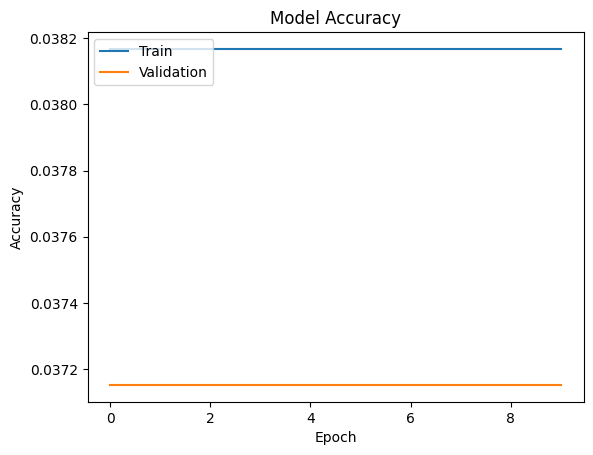

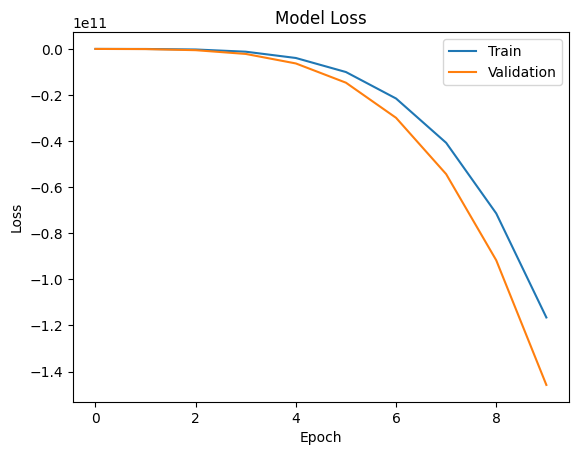

In [12]:
import matplotlib.pyplot as plt
# here ploting the train and val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Here Ploting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [13]:
# Evaluate the model on the test dataset
model.evaluate(test_data_gen, verbose=1)

26/26 [==============================] - 36s 1s/step - loss: -158490263552.0000 - accuracy: 0.0593


[-158490263552.0, 0.05925925821065903]

# predicting this model with all test images

In [14]:
for i, class_name in enumerate(class_names):
    folder_path = os.path.join(test_dir, class_name)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(folder_path, file)
                image = tf.keras.preprocessing.image.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255.0
                input_arr = np.expand_dims(input_arr, axis=0)
                predictions = model.predict(input_arr)
                score = predictions[0][0]
                print("Image {} is predicted as {} with {:.2f}% accuracy.".format(file_path, class_name, 100 * score))

1/1 [==============================] - 0s 252ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_01\14-CAPTURE_20220523_141530_080.png is predicted as CLASS_01 with 100.00% accuracy.
1/1 [==============================] - 0s 43ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\05-CAPTURE_20220421_053715_321.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\10-CAPTURE_20220531_103015_235.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\10-CAPTURE_20220531_103237_465.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 60ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\10-CAPTURE_20220531_103808_935.png is pred

1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220427_233428_111.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220427_233437_914.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220427_233731_550.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 52ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220427_233949_379.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 54ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220523_233323_293.png is predi

1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220425_143633_691.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220427_143242_902.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220523_141009_413.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220531_142030_133.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220531_143709_341.png is predi

1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\22-CAPTURE_20220421_221140_636.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 56ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\23-CAPTURE_20220420_233412_343.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\23-CAPTURE_20220420_234021_821.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\23-CAPTURE_20220421_232837_601.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\23-CAPTURE_20220421_233636_301.png is predi

1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220425_143206_434.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 60ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220425_143511_473.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 83ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220523_143126_479.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 68ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220531_144120_194.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220614_143053_465.png is predi

1/1 [==============================] - 0s 52ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220426_064159_258.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220427_064219_187.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220427_065157_709.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220523_061532_229.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220523_061715_050.png is predi

1/1 [==============================] - 0s 81ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\08-CAPTURE_20220614_080647_821.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 75ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\08-CAPTURE_20220620_075444_314.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 82ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\08-CAPTURE_20220620_082635_716.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 85ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\08-CAPTURE_20220620_085053_221.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 76ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\09-CAPTURE_20220418_093506_338.png is predi

1/1 [==============================] - 0s 52ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\10-CAPTURE_20220614_102935_426.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\10-CAPTURE_20220614_102951_430.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\11-CAPTURE_20220418_110921_918.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\11-CAPTURE_20220420_110636_725.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\11-CAPTURE_20220420_110656_529.png is predi

1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_123528_563.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_123934_815.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 54ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_124924_339.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 57ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_125209_373.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_125759_447.png is predi

1/1 [==============================] - 0s 75ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220421_144127_575.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 90ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220421_144526_624.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 96ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220421_144645_041.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 83ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220422_140359_026.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 101ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220422_144741_977.png is pred

1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220418_162409_873.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220418_162826_727.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220420_155637_963.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220420_160657_493.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220420_161342_578.png is predi

1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_172252_922.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 54ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_172324_128.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 52ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_172745_383.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_173606_688.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_173946_134.png is predi

1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220523_180757_795.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220523_182432_403.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220531_180349_946.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220531_180404_949.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220531_180642_582.png is predi

1/1 [==============================] - 0s 92ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220418_204052_709.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 123ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220420_200200_655.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 122ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220420_200219_859.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 106ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220420_200843_741.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 76ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220420_200950_755.png is pr

1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_214615_643.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_215450_351.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_215757_190.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_215808_593.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_215924_009.png is predi

1/1 [==============================] - 0s 55ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220418_232126_320.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220418_232510_367.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220418_233004_628.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220420_230722_004.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 174ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220420_232240_998.png is pred

1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220531_234229_610.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220614_230238_713.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220614_230334_925.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220614_232019_736.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220614_232318_773.png is predi

1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220421_095341_747.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220425_094210_717.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 64ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220620_090358_587.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220620_090526_405.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 58ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220620_092138_609.png is predi

1/1 [==============================] - 0s 72ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220420_174318_706.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 56ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220420_174411_517.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 59ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220422_171515_032.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 60ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220426_170100_648.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 58ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220426_170110_650.png is predi

1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220426_215709_581.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 74ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220426_215821_195.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 71ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220531_211045_090.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 113ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220531_211221_311.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 56ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220531_214127_677.png is pred

1/1 [==============================] - 0s 90ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\18-CAPTURE_20220421_182224_952.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [==============================] - 0s 68ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\18-CAPTURE_20220421_182623_602.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [==============================] - 0s 55ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\19-CAPTURE_20220421_192506_342.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [==============================] - 0s 62ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\21-CAPTURE_20220421_210325_379.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [==============================] - 0s 60ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\22-CAPTURE_20220421_220529_958.png is predi

In [15]:
# Get class names
class_names = sorted([dI for dI in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, dI))])

# Loop through each class and test image
for class_name in class_names:
    folder_path = os.path.join(test_dir, class_name)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".png"):
                # Get file path
                file_path = os.path.join(folder_path, file)
                
                # Load image and resize
                image = tf.keras.preprocessing.image.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                
                # Convert image to array
                input_arr = tf.keras.preprocessing.image.img_to_array(image)
                
                # Convert single image to a batch
                input_arr = np.array([input_arr])
                
                # Predict using the model
                predictions = model.predict(input_arr)
                score = predictions[0][0]

                print("Image {} is predicted as {} with {:.2f}% accuracy."
                      .format(file_path, class_name, 100 * score))


1/1 [==============================] - 0s 55ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_01\14-CAPTURE_20220523_141530_080.png is predicted as CLASS_01 with 100.00% accuracy.
1/1 [==============================] - 0s 38ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\05-CAPTURE_20220421_053715_321.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 40ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\10-CAPTURE_20220531_103015_235.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\10-CAPTURE_20220531_103237_465.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\10-CAPTURE_20220531_103808_935.png is predi

1/1 [==============================] - 0s 43ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220427_233428_111.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220427_233437_914.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220427_233731_550.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220427_233949_379.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_02\23-CAPTURE_20220523_233323_293.png is predi

1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220425_143633_691.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220427_143242_902.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220523_141009_413.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220531_142030_133.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\14-CAPTURE_20220531_143709_341.png is predi

1/1 [==============================] - 0s 43ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\22-CAPTURE_20220421_221140_636.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\23-CAPTURE_20220420_233412_343.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\23-CAPTURE_20220420_234021_821.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\23-CAPTURE_20220421_232837_601.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_03\23-CAPTURE_20220421_233636_301.png is predi

1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220425_143206_434.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220425_143511_473.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220523_143126_479.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 43ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220531_144120_194.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_04\14-CAPTURE_20220614_143053_465.png is predi

1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220426_064159_258.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220427_064219_187.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220427_065157_709.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220523_061532_229.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\06-CAPTURE_20220523_061715_050.png is predi

1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\08-CAPTURE_20220614_080647_821.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\08-CAPTURE_20220620_075444_314.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\08-CAPTURE_20220620_082635_716.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\08-CAPTURE_20220620_085053_221.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\09-CAPTURE_20220418_093506_338.png is predi

1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\10-CAPTURE_20220614_102935_426.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 52ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\10-CAPTURE_20220614_102951_430.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 55ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\11-CAPTURE_20220418_110921_918.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 55ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\11-CAPTURE_20220420_110636_725.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 56ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\11-CAPTURE_20220420_110656_529.png is predi

1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_123528_563.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_123934_815.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_124924_339.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_125209_373.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\12-CAPTURE_20220425_125759_447.png is predi

1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220421_144127_575.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220421_144526_624.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220421_144645_041.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220422_140359_026.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\14-CAPTURE_20220422_144741_977.png is predi

1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220418_162409_873.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220418_162826_727.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220420_155637_963.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220420_160657_493.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\16-CAPTURE_20220420_161342_578.png is predi

1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_172252_922.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_172324_128.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 54ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_172745_383.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_173606_688.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\17-CAPTURE_20220426_173946_134.png is predi

1/1 [==============================] - 0s 41ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220523_180757_795.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220523_182432_403.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 43ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220531_180349_946.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220531_180404_949.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\18-CAPTURE_20220531_180642_582.png is predi

1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220418_204052_709.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220420_200200_655.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 46ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220420_200219_859.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220420_200843_741.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\20-CAPTURE_20220420_200950_755.png is predi

1/1 [==============================] - 0s 54ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_214615_643.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 58ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_215450_351.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 53ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_215757_190.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 65ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_215808_593.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 84ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\21-CAPTURE_20220426_215924_009.png is predi

1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220418_232126_320.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220418_232510_367.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220418_233004_628.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220420_230722_004.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220420_232240_998.png is predi

1/1 [==============================] - 0s 43ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220531_234229_610.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 50ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220614_230238_713.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220614_230334_925.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220614_232019_736.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 43ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_05\23-CAPTURE_20220614_232318_773.png is predi

1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220421_095341_747.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 41ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220425_094210_717.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220620_090358_587.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 43ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220620_090526_405.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\09-CAPTURE_20220620_092138_609.png is predi

1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220420_174318_706.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 69ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220420_174411_517.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 55ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220422_171515_032.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 71ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220426_170100_648.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 63ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\17-CAPTURE_20220426_170110_650.png is predi

1/1 [==============================] - 0s 51ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220426_215709_581.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 52ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220426_215821_195.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 49ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220531_211045_090.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 55ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220531_211221_311.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 68ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_07\21-CAPTURE_20220531_214127_677.png is predi

1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\18-CAPTURE_20220421_182224_952.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\18-CAPTURE_20220421_182623_602.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\19-CAPTURE_20220421_192506_342.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\21-CAPTURE_20220421_210325_379.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [==============================] - 0s 44ms/step
Image C:\Users\HP G5\anacondasalam\All_project\client_data\test\CLASS_08\22-CAPTURE_20220421_220529_958.png is predi

In [35]:
from tensorflow.keras.preprocessing import image
from pathlib import Path
from sklearn import svm, metrics
from skimage.io import imread
from sklearn.utils import Bunch
from skimage.transform import resize
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

 the function that load image files from dataset

In [36]:
def load_image_files(container_path, dimension=(64, 64)):
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [37]:
# load image file from dataset
#image_data = load_image_files('C:/Users/ruben/Desktop/Prueba Final/dataset/train')
image_data = load_image_files("C:\\Users\\HP G5\\anacondasalam\\All_project\\client_data\\train")
print(image_data)

{'data': array([[0.74260718, 0.72350136, 0.50500419, ..., 0.22695467, 0.144664  ,
        0.08175411],
       [0.74130102, 0.74133543, 0.52355478, ..., 0.2176512 , 0.14627559,
        0.08521406],
       [0.63624821, 0.64188374, 0.39510581, ..., 0.1313067 , 0.08811747,
        0.03980937],
       ...,
       [0.73484285, 0.75090609, 0.54126424, ..., 0.19269737, 0.12839654,
        0.07051462],
       [0.63425934, 0.64177042, 0.42972412, ..., 0.13772837, 0.09147469,
        0.04497869],
       [0.5975777 , 0.53953517, 0.30741041, ..., 0.12895091, 0.07043974,
        0.0171271 ]]), 'target': array([1, 1, 1, ..., 7, 7, 7]), 'target_names': ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08'], 'images': array([[[[7.42607180e-01, 7.23501359e-01, 5.05004187e-01],
         [7.32250257e-01, 7.07082060e-01, 4.92391955e-01],
         [7.33328042e-01, 7.01250710e-01, 4.84279427e-01],
         ...,
         [7.33021616e-02, 7.62558732e-02, 2.73495093e-02

In [38]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    image_data.data, image_data.target, test_size=0.3,random_state=109)

Classification using SVM

In [74]:
# Define the parameter grid for grid search
param_grid = {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}

# Use a smaller subset of data
X_train_subset = X_train[:1000]  # Adjust the subset size as per your dataset
y_train_subset = y_train[:1000]

In [75]:
# Define SVM model
svc = svm.SVC()

In [76]:
# Perform grid search cross-validation
clf = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
clf.fit(X_train_subset, y_train_subset)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]})

In [77]:

# Get predictions for test data
pred = clf.predict(X_test)

# Print classification report
print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(y_test, pred)))

Classification report for - 
GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}):
              precision    recall  f1-score   support

           1       0.73      0.53      0.62        15
           2       0.81      0.79      0.80        58
           3       0.86      0.77      0.81        31
           4       0.95      0.97      0.96       304
           5       1.00      1.00      1.00        11
           6       0.79      0.83      0.81        53
           7       0.81      0.72      0.76        18

    accuracy                           0.90       490
   macro avg       0.85      0.80      0.82       490
weighted avg       0.90      0.90      0.90       490




In [79]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Getting confusion matrix for SVM model
cnf_matrix = confusion_matrix(y_test, pred)
print(cnf_matrix)




[[  8   0   3   4   0   0   0]
 [  0  46   0   6   0   5   1]
 [  3   0  24   0   0   4   0]
 [  0   5   0 294   0   3   2]
 [  0   0   0   0  11   0   0]
 [  0   6   1   2   0  44   0]
 [  0   0   0   5   0   0  13]]


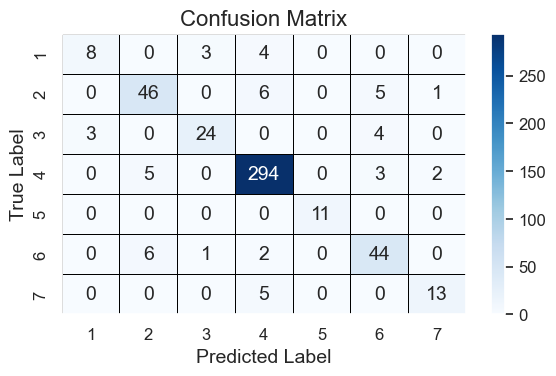

In [80]:
# Plotting the confusion matirx
class_names = np.unique(y_test)
sns.set(font_scale=1.2)  #  font size 
plt.figure(figsize=(6, 4))  # A figure size 

# Create a heatmap with annotations
ax = sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                 annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")

# Draw borders around the plot
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)

# Set axis labels and title
ax.set_title("Confusion Matrix", fontsize=16)
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)

# Set x and y axis tick labels
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)

# Add a colorbar
cbar = ax.figure.colorbar(ax.collections[0])
cbar.ax.tick_params(labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Classification using KNN

In [66]:
# Define KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

In [67]:
# Train data with KNN model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:

# Define KNN model
knn_model = KNeighborsClassifier()

# Define parameter grid for n_neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9]}

In [69]:

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [70]:

# Get best model from grid search
best_model = grid_search.best_estimator_

In [71]:
# Get predictions for best model
predict_knn = best_model.predict(X_test)
print(predict_knn)

[3 4 4 4 4 4 4 1 4 4 7 1 4 3 7 4 4 4 4 4 4 4 2 4 7 4 4 4 1 4 4 2 2 2 2 4 4
 4 4 4 4 2 4 4 4 4 4 4 4 6 5 7 4 4 4 4 5 5 4 4 4 4 4 4 5 1 4 4 4 4 4 6 4 4
 4 2 4 3 4 4 4 4 2 4 4 4 4 4 4 4 4 4 2 4 4 2 4 4 4 2 4 2 4 4 4 4 4 4 4 4 4
 3 4 4 4 4 4 7 4 4 4 4 4 4 4 2 4 7 7 7 5 4 4 4 4 3 4 4 4 5 4 4 4 2 4 2 4 4
 4 4 4 4 4 7 4 4 4 4 4 4 4 7 4 2 4 4 3 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4
 4 4 2 4 4 3 4 4 4 7 4 4 4 4 2 4 4 5 2 3 2 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 7
 4 2 2 4 4 4 7 4 4 4 2 4 4 4 4 4 4 2 4 4 4 4 4 7 4 4 4 4 4 4 4 2 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 2 4 4 4 4 4 4 4 1 4 4 4 2 4 4 6 6
 3 5 4 4 4 6 4 4 4 4 4 3 4 4 2 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4
 2 7 2 4 5 4 4 4 4 4 4 7 4 4 2 3 4 4 4 4 7 5 4 4 4 7 4 4 2 2 2 4 2 3 7 4 4
 4 4 4 2 4 4 4 4 4 2 4 4 4 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 2 4 4 4 2 4 4 4 4
 1 4 4 4 7 4 7 2 4 2 4 4 4 4 2 4 2 7 4 5 4 4 4 4 4 4 4 4 4 4 7 4 4 4 4 4 5
 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 3 4 2 2 4 3 6 4 2 4 4 7 4 5 4 4 4 2 4
 4 4 4 4 4 4 4 4 4]


In [72]:

# Compute confusion matrix
knn_cnf_matrix = confusion_matrix(y_test, predict_knn)
print(knn_cnf_matrix)



[[  3   0   0  10   0   1   1]
 [  0  22   1  28   0   0   7]
 [  3   9  14   4   0   1   0]
 [  0   1   0 293   3   0   7]
 [  0   0   0   0  11   0   0]
 [  1  25   0  21   0   4   2]
 [  0   1   0  10   0   0   7]]


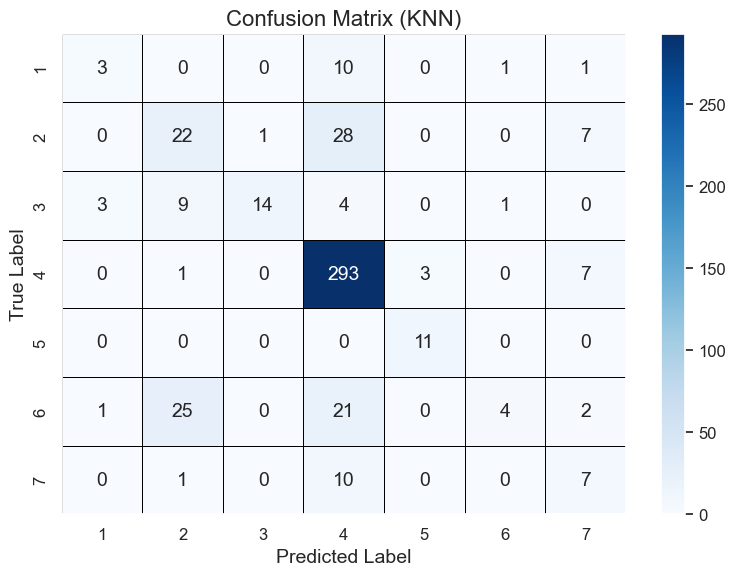

In [78]:
# Plotting the confusion matrix with Seaborn
class_names = np.unique(y_test)
sns.set(font_scale=1.2)  #  font size 
plt.figure(figsize=(8, 6))  #  figure size 

# Create a heatmap with annotations
ax = sns.heatmap(knn_cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                 annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")

# borders around the plot
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)

# labels and title
ax.set_title("Confusion Matrix (KNN)", fontsize=16)
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)

#  tick labels
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)

# addingcolorbar
cbar = ax.figure.colorbar(ax.collections[0])
cbar.ax.tick_params(labelsize=12)

# Show plot
plt.tight_layout()
plt.show()
